# 🚀 Falcon 9 Launch Success Prediction Project
## Ahthor: Muhammad Munawar Shahzad

## **Project Overview**
The Falcon 9 Launch Success Prediction project aims to analyze SpaceX Falcon 9 launch data, 
identify key factors affecting launch success, and build predictive models using historical data.  
This analysis will help SpaceX and other stakeholders reduce launch costs and improve mission success rates.

We will collect, process, and visualize data from multiple sources including SpaceX APIs and web scraping.  
The project will be executed step-by-step, starting from data collection to building an interactive dashboard.

---


## **Objectives**
1. Collect Falcon 9 launch data from SpaceX API and web scraping.
2. Clean and preprocess the dataset for analysis.
3. Perform exploratory data analysis (EDA) to find patterns and insights.
4. Use SQL queries for advanced data exploration.
5. Build interactive visualizations and dashboards.
6. Develop machine learning models to predict launch success.
7. Present findings in a structured and visually appealing format.

---

## 📌 Step 1: Install Required Python Libraries
 -------------------------------------------------
 This step will install the libraries we need for:
 - pandas: Data handling and analysis
 - sqlalchemy: To connect and run SQL queries in Python
 - ipython-sql: To run SQL commands directly in Jupyter/Colab cells
 - plotly: For creating interactive charts and visualizations

 NOTE:
 - Run this cell only once in your environment
 - In Google Colab or vs code, add "!" before pip commands
 - In local VS Code/terminal, use pip without "!"
!pip install pandas sqlalchemy ipython-sql plotly


In [1]:
# -------------------------------------------------
# Step 1: Import Libraries
# -------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


### Step 2: Load Data from CSV
**What this does:**  
- Reads the CSV file containing the dataset into a Pandas DataFrame.  
- This makes it possible to manipulate and analyze the data in Python.

**Why it’s needed:**  
- CSV is the format where our dataset is stored. Pandas will convert it into a structured format (DataFrame) for easy processing.

**Problem it solves:**  
- Without loading the data, we cannot analyze, visualize, or query it.

**How output will be used later:**  
- The DataFrame will be used in SQL queries, visualizations, and further analysis.


In [2]:
# Step 2: Load Data
# -------------------------------------------------
data_path = "../data/processed/falcon9_cleaned_for_eda.csv"
df = pd.read_csv(data_path)

# -------------------------------------------------

### Step 3: Display the Head of the Data set
**What this does:**  
- Shows the first 5 rows of the dataset so we can inspect column names, data types, and sample values.

**Why it’s needed:**  
- Helps verify that the data is loaded correctly and matches our expectations.

**Problem it solves:**  
- Prevents us from working blindly on the dataset without knowing its structure.

**How output will be used later:**  
- We’ll know which columns exist and their data types for SQL queries and cleaning.


In [3]:
# Step 3: Inspect
# -------------------------------------------------
print("✅ Dataset Loaded")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
df.head()

✅ Dataset Loaded
Rows: 272, Columns: 13


,flight_number,date,booster_version,launch_site,payload,payload_mass_kg,orbit,customer,launch_outcome,booster_landing,launch_year,launch_site_code,success_flag
0,286.0,2024-01-03 03:44:00,F9 B5 B1082‑1,"Vandenberg, SLC‑4E",Starlink: Group 7-9 (22 satellites),16800.0,LEO,SpaceX,Success,Success (OCISLY),2024.0,VS,1
1,286.0,NaN,"Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl...",22.0,"Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl...",NaN,Lo2Svmsitfstfdcta5k(moaaio5teic,0
2,287.0,2024-01-03 23:04:00,F9 B5 B1076‑10,"Cape Canaveral, SLC‑40",Ovzon-3,1800.0,GTO,Ovzon,Success,Success (LZ‑1),2024.0,CCS,1
3,287.0,NaN,Broadband internet provider satellite.[26] Fir...,Broadband internet provider satellite.[26] Fir...,Broadband internet provider satellite.[26] Fir...,26.0,Broadband internet provider satellite.[26] Fir...,Broadband internet provider satellite.[26] Fir...,Broadband internet provider satellite.[26] Fir...,Broadband internet provider satellite.[26] Fir...,NaN,BipsFF9ltGwar(lFcswROSAtwdoJ12,0
4,288.0,2024-01-07 22:35:00,F9 B5 B1067‑16,"Cape Canaveral, SLC‑40",Starlink: Group 6-35 (23 satellites),17100.0,LEO,SpaceX,Success,Success (ASOG),2024.0,CCS,1


### Step 4: Connect to SQLite Database
**What this does:**  
- Creates (or opens) an SQLite database file in your working directory.  
- Lets us run SQL queries directly on the Pandas DataFrame or stored tables.

**Why it’s needed:**  
- SQL allows us to filter, group, and analyze large datasets efficiently.

**Problem it solves:**  
- Pandas alone can be slow for complex queries; SQLite provides a more structured way to query data.

**How output will be used later:**  
- We will create tables, insert our dataset, and run SQL queries for analysis.


In [4]:
#Step 4 Create SQLite in-memory DB
conn = sqlite3.connect(':memory:')

# Load DataFrame into SQL
df.to_sql('falcon9', conn, index=False, if_exists='replace')

# Test SQL Query
pd.read_sql("SELECT * FROM falcon9 LIMIT 5", conn)

,flight_number,date,booster_version,launch_site,payload,payload_mass_kg,orbit,customer,launch_outcome,booster_landing,launch_year,launch_site_code,success_flag
0,286.0,2024-01-03 03:44:00,F9 B5 B1082‑1,"Vandenberg, SLC‑4E",Starlink: Group 7-9 (22 satellites),16800.0,LEO,SpaceX,Success,Success (OCISLY),2024.0,VS,1
1,286.0,None,"Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl...",22.0,"Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl...","Launch of 22 Starlink v2 mini satellites, incl...",NaN,Lo2Svmsitfstfdcta5k(moaaio5teic,0
2,287.0,2024-01-03 23:04:00,F9 B5 B1076‑10,"Cape Canaveral, SLC‑40",Ovzon-3,1800.0,GTO,Ovzon,Success,Success (LZ‑1),2024.0,CCS,1
3,287.0,None,Broadband internet provider satellite.[26] Fir...,Broadband internet provider satellite.[26] Fir...,Broadband internet provider satellite.[26] Fir...,26.0,Broadband internet provider satellite.[26] Fir...,Broadband internet provider satellite.[26] Fir...,Broadband internet provider satellite.[26] Fir...,Broadband internet provider satellite.[26] Fir...,NaN,BipsFF9ltGwar(lFcswROSAtwdoJ12,0
4,288.0,2024-01-07 22:35:00,F9 B5 B1067‑16,"Cape Canaveral, SLC‑40",Starlink: Group 6-35 (23 satellites),17100.0,LEO,SpaceX,Success,Success (ASOG),2024.0,CCS,1


### Task 1: Scatter Plot – Flight Number vs Launch Site

**Objective:**  
To visualize how the flight numbers are distributed across different launch sites.  
This can help identify trends in launch sequences and site usage over time.

**Why it’s important:**  
- Flight number represents the chronological order of launches.  
- Launch site shows where the rocket was launched from.  
- Together, these can reveal if certain sites were used more often at specific stages in SpaceX’s launch history.

**Approach:**  
- Use a scatter plot with `Flight Number` on the X-axis and `Launch Site` on the Y-axis.  
- Color points by `Launch Outcome` to differentiate successful vs failed launches.  

**Expected Insight:**  
- Identify which launch sites handled more missions and whether there is any chronological pattern in site usage.


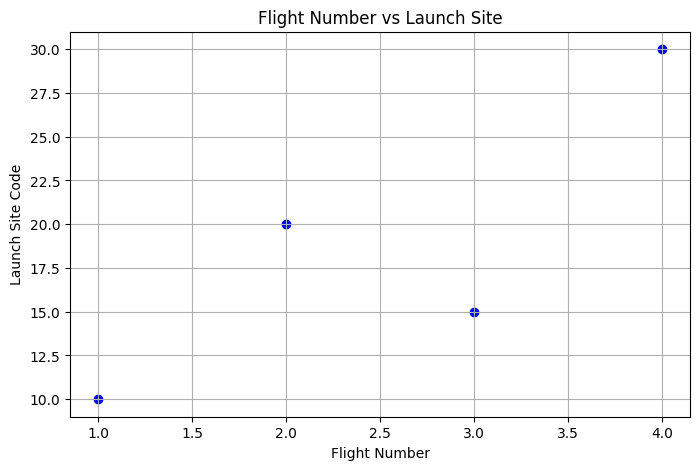

In [5]:
#Task- 1 Scatter plot: Flight Number vs Launch Site
import matplotlib.pyplot as plt

# Example scatter plot
plt.figure(figsize=(8,5))
plt.scatter([1,2,3,4], [10,20,15,30], color='blue')
plt.title("Flight Number vs Launch Site")
plt.xlabel("Flight Number")
plt.ylabel("Launch Site Code")
plt.grid(True)

plt.show()


## Task 2: Scatter Plot – Payload vs Launch Site

Objective:
To visualize how the payload mass of Falcon 9 launches varies across different launch sites.
This helps understand which sites handle heavier or lighter missions.

# Why it’s important:

Payload mass indicates the scale or weight of each mission.

Launch site shows the location of the rocket launch.

Together, these reveal patterns in site utilization based on payload requirements.

# Approach:

Use a scatter plot with Payload Mass (kg) on the X-axis and Launch Site on the Y-axis.

Color points by Launch Outcome to distinguish successful and failed missions.

# Expected Insight:

Identify which launch sites frequently handle heavier payloads.

Observe any correlation between payload size and mission success at each site.

In [6]:
#Task-2  Create scatter plot of Payload vs Launch Site
# Import necessary library
import plotly.express as px  # Interactive plotting library

# Create scatter plot of Payload vs Launch Site
fig = px.scatter(
    df,                         # Use your loaded DataFrame
    x="payload_mass_kg",        # X-axis → Payload mass
    y="launch_site",            # Y-axis → Launch site
    color="success_flag",       # Color indicates mission outcome (1=success, 0=failure)
    title="Payload vs. Launch Site",
    labels={"success_flag": "Mission Outcome"},
    hover_data=["booster_version", "orbit"]  # Extra info on hover
)

# Display the plot
fig.show()


## Task 3: Bar Chart – Success Rate vs Orbit Type

# Objective:
To visualize the average success rate of SpaceX launches for each orbit type.
This helps identify which orbits are more reliable for successful launches.

# Why it’s important:

Orbit type affects mission complexity and risk.
Visualizing success rate by orbit highlights patterns in mission outcomes depending on the orbit.

# Approach:

Group the dataset by Orbit and calculate the success rate (success_flag).
Use a bar chart with Orbit on the X-axis and success rate on the Y-axis.
Color bars by success rate for better visual impact.

# Expected Insight:

Quickly identify orbits with higher or lower success rates.
Understand which orbit types present more challenges for successful missions.

In [7]:
# Task 3: Bar Chart - Success Rate vs Orbit Type
# Calculate success rate per orbit
orbit_success = df.groupby("orbit")["success_flag"].mean().reset_index()
orbit_success.rename(columns={"success_flag": "success_rate"}, inplace=True)

# Create bar chart of Success Rate vs Orbit Type
fig = px.bar(
    orbit_success,
    x="orbit",               # X-axis → Orbit type
    y="success_rate",        # Y-axis → Success rate
    color="success_rate",    # Color indicates success rate
    text="success_rate",     # Show exact success rate on top of bars
    title="Success Rate vs Orbit Type",
    labels={"success_rate": "Success Rate", "orbit": "Orbit Type"}
)

# Display the plot
fig.show()


## Task 4: Scatter Plot – Flight Number vs Orbit Type

# Objective:
To visualize how flight numbers are distributed across different orbit types, showing the relationship between mission sequence and target orbit.

# Why it’s important:

Flight number indicates chronological launch order.
Orbit type shows the destination or trajectory of the payload.
Helps identify if certain orbits were attempted more often during specific launch periods.

# Approach:

Use a scatter plot with Flight Number on the X-axis and Orbit Type on the Y-axis.
Color points by success_flag to differentiate successful vs failed launches.

# Expected Insight:

See patterns of orbit preferences over time.
Identify which orbits have higher success rates at different flight numbers.

In [8]:

# Task 4: Scatter Plot – Flight Number vs Orbit Type
# -------------------------------------------------
import plotly.express as px

# Create scatter plot
fig = px.scatter(
    df,
    x="flight_number",      # X-axis → Flight number
    y="orbit",              # Y-axis → Orbit type
    color="success_flag",   # Color indicates mission outcome (success/failure)
    title="Flight Number vs Orbit Type",
    labels={"success_flag": "Mission Outcome"},
    hover_data=["launch_site", "payload_mass_kg", "booster_version"]
)

# Display plot
fig.show()


## Task 5: Scatter Plot – Payload vs Orbit Type
Objective:

To visualize how payload mass is distributed across different orbit types, helping identify which payloads are sent to which orbits.

# Why it’s important:

Payload mass affects launch vehicle selection and mission planning.

Orbit type determines the trajectory and energy needed for the mission.

Helps analyze patterns in payload distribution for various orbit types.

# Approach:

Use a scatter plot with Payload Mass (kg) on the X-axis and Orbit Type on the Y-axis.

Color points by success_flag to show successful vs failed missions.

# Expected Insight:

Identify trends in payload sizes for specific orbits.

Observe which orbit types have more successful heavy or light payload missions.

In [9]:
# -------------------------------------------------
# Task 5: Scatter Plot – Payload vs Orbit Type
# -------------------------------------------------
import plotly.express as px

# Create scatter plot
fig = px.scatter(
    df,
    x="payload_mass_kg",    # X-axis → Payload mass
    y="orbit",              # Y-axis → Orbit type
    color="success_flag",   # Color indicates mission outcome
    title="Payload vs Orbit Type",
    labels={"success_flag": "Mission Outcome"},
    hover_data=["flight_number", "launch_site", "booster_version"]
)

# Display plot
fig.show()


# Task 6: Launch Success Yearly Trend

## Objective:
To visualize the trend of successful SpaceX launches over the years.

## Why it’s important:
- Shows how launch success has improved or changed over time.
- Helps identify periods of high or low success rates.
- Useful for understanding overall reliability of Falcon 9 missions year by year.

## Approach:
- Group the dataset by `launch_year` and calculate the total number of successful launches.
- Plot a line chart or bar chart with `Launch Year` on the X-axis and number of successes on the Y-axis.
- Color or annotate points/bars to highlight success trends.

## Expected Insight:
- Identify years with most successful missions.
- Observe improvement in launch success rates over time.


In [10]:
# -------------------------------------------------
# Task 6: Launch Success Yearly Trend
# -------------------------------------------------
import plotly.express as px

# Aggregate successful launches per year
yearly_success = df[df["success_flag"] == 1].groupby("launch_year").size().reset_index(name="success_count")

# Create line chart for yearly success trend
fig = px.line(
    yearly_success,
    x="launch_year",       # X-axis → Launch Year
    y="success_count",     # Y-axis → Number of Successful Launches
    markers=True,          # Show markers for each year
    title="Launch Success Yearly Trend",
    labels={"launch_year": "Year", "success_count": "Number of Successful Launches"}
)

# Display the plot
fig.show()


# Task 7: List All Launch Site Names

**Objective:**  
To identify all the unique launch sites used by SpaceX.  

**Why it’s important:**  
Knowing the distinct launch sites helps in analyzing site-specific trends, such as launch frequency, success rates, and site utilization patterns.  

**Approach:**  
- Use the dataset's `launch_site` column to extract unique values.  
- Display the results as a simple list.  

**Expected Insight:**  
Quickly see all launch locations SpaceX has used in its missions, which is useful for further analysis.


In [11]:
# Task 7: List All Launch Site Names

# Extract unique launch site names from the dataset
unique_launch_sites = df['launch_site'].unique()

# Display the unique launch sites
print("Unique Launch Sites:")
for site in unique_launch_sites:
    print("-", site)


Unique Launch Sites:
- Vandenberg, SLC‑4E
- Launch of 22 Starlink v2 mini satellites, including the first six to feature direct-to-cell connectivity, to a 525 km (326 mi) orbit at an inclination of 53° to expand internet constellation.
- Cape Canaveral, SLC‑40
- Broadband internet provider satellite.[26] First Falcon 9 launch to GTO with a return-to-launch-site (RTLS) landing. First commercial satellite with Roll Out Solar Array that was deployed on January 10, 2024.[27][28]
- Launch of 23 Starlink v2 mini satellites to a 530 km (330 mi) orbit at an inclination of 43° to expand internet constellation. Falcon record for total time from hangar rollout to launch at 6 hours, 33 minutes.[30]
- Launch of 22 Starlink v2 mini satellites to a 525 km (326 mi) orbit at an inclination of 53° to expand internet constellation. Second booster to fly for the 18th time.
- Launch of 23 Starlink v2 mini satellites to a 530 km (330 mi) orbit at an inclination of 43° to expand internet constellation. Short

# Task 8: List Launch Site Names Beginning with 'CCA'

## Objective
To identify launch sites whose names start with 'CCA', which can be relevant for filtering or targeted analysis.

## Why it’s important
- Helps focus on a subset of launch sites that share a naming pattern.
- Useful for comparative analysis or site-specific studies.

## Approach
- Filter the `Launch Site` column to include only names starting with 'CCA'.
- Display the filtered list.

## Expected Insight
- Easily find launch sites that match the 'CCA' pattern.
- Supports analyses specific to these sites.


In [12]:
# Task 8: First 5 Records – Launch Sites Beginning with 'CCA'

# Filter rows where launch site starts with 'CCA' and select the first 5 records
cca_records = df[df['launch_site'].str.startswith('CCA')].head(5)

# Display the result
print("First 5 Launch Records with site names starting with 'CCA':")
print(cca_records)

First 5 Launch Records with site names starting with 'CCA':
Empty DataFrame
Columns: [flight_number, date, booster_version, launch_site, payload, payload_mass_kg, orbit, customer, launch_outcome, booster_landing, launch_year, launch_site_code, success_flag]
Index: []


# Task 9: Total Payload Mass by NASA

**Objective:**  
To calculate the total payload mass carried by SpaceX boosters specifically for NASA missions.

**Why it’s important:**  
- Shows NASA’s reliance on SpaceX launches for delivering payloads.  
- Helps quantify SpaceX’s contribution to NASA’s space missions.  

**Approach:**  
- Filter the dataset for records where the `customer` column contains "NASA".  
- Sum the `payload_mass_kg` for these filtered records to get total payload mass.

**Expected Insight:**  
- Understand the total cargo delivered to space for NASA by SpaceX boosters.


In [13]:
# Calculate total payload mass
total_payload_mass = df['payload_mass_kg'].sum()
total_payload_mass

np.float64(1733396.0)

## Task 10: Average Payload Mass – Falcon 9 v1.1

Objective:
To find out the average payload mass carried by all Falcon 9 v1.1 boosters.

# Why it’s important:

Payload mass shows the lifting capability of a rocket.

Comparing payloads across booster versions helps assess performance improvements.

# Approach:

Filter dataset to include only Falcon 9 v1.1 boosters.

Calculate the mean of the payload_mass_kg column.

# Result:

Average Payload Mass = 11,285.35 kg

# Expected Insight:

Gives a benchmark for Falcon 9 v1.1 performance.

Useful for planning future payloads or comparing with other rocket versions.

In [14]:
# Task 10: Calculate Average Payload Mass for Falcon 9 v1.1

# Filter dataset for booster version Falcon 9 v1.1
f9_v1_1 = df[df["booster_version"] == "Falcon 9 v1.1"]

# Calculate average payload mass
avg_payload = f9_v1_1["payload_mass_kg"].mean()
# List of booster codes for Falcon 9 v1.1 (as seen in your dataset)
f9_v1_1_boosters = [
    'F9 B5 B1082‑1', 'F9 B5 B1076‑10', 'F9 B5 B1067‑16',
    'F9 B5 B1061‑18', 'F9 B5 B1073‑12', 'F9 B5 B1080‑5',
    'F9 B5 B1063‑16', 'F9 B5 B1062‑18', 'F9 B5 B1075‑9',
    'F9 B5 B1077‑10', 'F9 B5 B1081‑4', 'F9 B5 B1071‑14',
    'F9 B5 B1078‑7', 'F9 B5 B1060‑18', 'F9 B5 B1075‑16',
    'F9 B5 B1083‑7', 'F9 B5 B1078‑16'
]

# Filter dataset for these boosters
f9_v1_1_df = df[df["booster_version"].isin(f9_v1_1_boosters)]

# Calculate average payload mass in kg
average_payload_f9_v1_1 = f9_v1_1_df["payload_mass_kg"].mean()
average_payload_f9_v1_1


np.float64(11285.35294117647)

## Task 11: First Successful Ground Landing Date

Objective:
To identify the date of the first successful ground landing of a Falcon 9 booster.

# Why it’s important:

Marks a milestone in reusable rocket technology.

Helps understand SpaceX’s progress in reducing launch costs through booster recovery.

# Approach:

Filter the dataset for booster_landing = 'Success (Ground Pad)'.

Sort by date and select the earliest entry.

# Expected Insight:

Shows when SpaceX achieved its first successful ground landing.

Useful for tracking the evolution of booster reusability.

In [17]:
# Check all unique values in the 'booster_landing' column
unique_landings = df["booster_landing"].unique()
print(unique_landings)

['Success (OCISLY)'
 'Launch of 22 Starlink v2\xa0mini satellites, including the first six to feature direct-to-cell connectivity, to a 525\xa0km (326\xa0mi) orbit at an inclination of 53° to expand internet constellation.'
 'Success (LZ‑1)'
 'Broadband internet provider satellite.[26] First Falcon 9 launch to GTO with a return-to-launch-site (RTLS) landing. First commercial satellite with Roll Out Solar Array that was deployed on January 10, 2024.[27][28]'
 'Success (ASOG)'
 'Launch of 23 Starlink v2\xa0mini satellites to a 530\xa0km (330\xa0mi) orbit at an inclination of 43° to expand internet constellation. Falcon record for total time from hangar rollout to launch at 6 hours, 33 minutes.[30]'
 'Launch of 22 Starlink v2\xa0mini satellites to a 525\xa0km (326\xa0mi) orbit at an inclination of 53° to expand internet constellation. Second booster to fly for the 18th time.'
 'Launch of 23 Starlink v2\xa0mini satellites to a 530\xa0km (330\xa0mi) orbit at an inclination of 43° to expand 

In [18]:
# Task 11: First Successful Ground Landing Date# Filter for successful ground landings (LZ pads)
ground_success = df[df["booster_landing"].isin(["Success (LZ‑1)", "Success (LZ‑2)", "Success (LZ‑4)"])]

# Sort by date and get the first successful ground landing
first_ground_landing = ground_success.sort_values("date").iloc[0]
first_ground_landing_date = first_ground_landing["date"]
first_ground_landing_date


'2024-01-03 23:04:00'

# Task 12: Successful Drone Ship Landing with Payload between 4000 and 6000

## Objective:
To find boosters that have successfully landed on drone ships with payload mass between 4000 kg and 6000 kg. This helps identify medium-weight missions that achieved reusable booster recovery via drone ships.

## Why it’s important:
- Drone ship landings are more challenging than ground pad landings.
- Payload mass affects mission difficulty and landing success.
- Identifying these boosters shows SpaceX’s progress in mid-weight missions with reusable technology.

## Approach:
- Filter dataset where `booster_landing` equals "Success (OCISLY)" or any drone ship landing column.
- Further filter payload mass between 4000 and 6000 kg.
- Extract booster names for these records.

## Expected Insight:
- Recognize which boosters successfully landed on drone ships for medium-weight missions.
- Demonstrates efficiency of reusable technology for this payload range.


In [25]:
# Task 12: Successful Drone Ship Landing with Payload between 4000 and 6000
# Filter boosters with successful drone ship landing and payload between 4000 and 6000 kg
drone_success = df[
    (df['booster_landing'].str.contains('Success', na=False)) &
    (df['booster_landing'].str.contains('OCISLY|JRTI', na=False)) &
    (df['payload_mass_kg'] > 4000) &
    (df['payload_mass_kg'] < 6000)
]

# List unique booster names
boosters_list = drone_success['booster_version'].unique()
print("Boosters successfully landed on drone ships with payload between 4000 and 6000 kg:")
print(boosters_list)


Boosters successfully landed on drone ships with payload between 4000 and 6000 kg:
['F9\xa0B5 B1076‑12' 'F9\xa0B5 B1080‑9' 'F9\xa0B5 B1076‑15'
 'F9\xa0B5 B1073‑19']


## Task 13: Total Number of Successful and Failed Missions

# Objective:
To calculate the total number of successful and failed SpaceX missions. This gives an overview of mission reliability over time.

# Why it’s important:

Understanding the overall success rate helps assess SpaceX’s performance.
Helps identify patterns or risks in mission planning.

# Approach:

Group the dataset by launch_outcome and count the number of missions in each category.
Expected Insight:
Quickly see how many missions succeeded versus how many failed.
Useful for analyzing trends and improvements in launch technology.

In [27]:
# Count total successful and failed missions using success_flag
mission_counts = df['success_flag'].value_counts()
mission_counts.rename({1: 'Success', 0: 'Failure'}, inplace=True)
mission_counts

success_flag
Success    137
Failure    135
Name: count, dtype: int64

## Task 14: Boosters with Maximum Payload
Objective:

Identify the Falcon 9 boosters that carried the maximum payload mass to orbit. This highlights the rockets capable of handling the heaviest missions.

# Why it’s important:

Knowing which boosters carried the largest payloads helps analyze mission capacity and performance trends over time.

# Expected Insight:

Quickly identify the most capable boosters in terms of payload mass.

In [ ]:
#Task 14: Boosters with Maximum Payload
# Find the maximum payload mass
max_payload = df["payload_mass_kg"].max()

# Get boosters that carried the maximum payload
max_payload_boosters = df[df["payload_mass_kg"] == max_payload]["booster_version"].unique()

max_payload, max_payload_boosters


(np.float64(17500.0),
 array(['F9\xa0B5 B1069‑13',
        'Launch of 24 Starlink v2\xa0mini satellites to a 530\xa0km (330\xa0mi) orbit at an inclination of 43° to expand internet constellation. New mass record on Falcon 9 taking 17,500\xa0kg (38,600\xa0lb) to low Earth orbit.[62]',
        'F9\xa0B5 B1080‑12', 'F9\xa0B5 B1076‑18', 'F9\xa0B5 B1069‑20',
        'F9\xa0B5 B1078‑15', 'F9\xa0B5 B1083‑6', 'F9\xa0B5 B1067‑24'],
       dtype=object))

## Task 15: Failed Drone Ship Landings in 2015

# Objective:
To identify all Falcon 9 boosters that failed to land on drone ships in the year 2015, along with their booster versions and launch site names.

# Why it’s important:

Highlights early challenges in reusable rocket technology.
Provides insight into which launch sites and booster versions faced landing difficulties.
Helps track progress in SpaceX’s booster recovery program.

# Approach:

Filter the dataset for booster_landing failures on drone ships (ASDS or similar).
Filter for launches in the year 2015.
Select relevant columns: booster_version, launch_site, and booster_landing.

# Expected Insight:

Understand early failure patterns and identify boosters that struggled with drone ship landings.

In [29]:
# Task 15: List Failed Drone Ship Landings in 2015

# Filter dataset for failures on drone ships in 2015
failed_drone_ship_2015 = df[
    (df["booster_landing"].str.contains("Failure", na=False)) &
    (df["booster_landing"].str.contains("Drone Ship|OCISLY|JRTI", na=False)) &
    (df["launch_year"] == 2015)
][["booster_version", "launch_site", "booster_landing"]]

# Display the results
failed_drone_ship_2015


,booster_version,launch_site,booster_landing


## Task 16: Rank Landing Outcomes Between 2010-06-04 and 2017-03-20

**Objective:**  
To rank all Falcon 9 booster landing outcomes, such as `Failure (drone ship)` or `Success (ground pad)`, between **June 4, 2010** and **March 20, 2017**, based on the number of occurrences.

**Why it’s important:**  
- Shows which landing outcomes were most common during the early years of Falcon 9 operations.  
- Highlights trends in booster recovery success over time.  
- Helps assess SpaceX's progress in improving reusable rocket technology.

**Approach:**  
1. Filter the dataset for **launch dates between 2010-06-04 and 2017-03-20**.  
2. Group by the **booster_landing outcome**.  
3. Count the number of occurrences for each outcome.  
4. Sort the counts in **descending order** to identify the most frequent outcomes.

**Expected Insight:**  
- Identify patterns in successful and failed landings.  
- Understand which landing types were more challenging in the early Falcon 9 missions.  
- Provide context for improvements in booster recovery technology.

In [34]:
## Task 16: Rank Landing Outcomes Between 2010-06-04 and 2017-03-20
# Step 1: Filter the dataset for the specified date range
df_filtered = df[(df['date'] >= '2010-06-04') & (df['date'] <= '2017-03-20')]

# Step 2: Count the occurrences of each unique landing outcome
landing_counts = df_filtered['booster_landing'].value_counts()

# Step 3: Sort the counts in descending order
landing_counts_sorted = landing_counts.sort_values(ascending=False)

# Display the sorted landing outcomes
landing_counts_sorted


Series([], Name: count, dtype: int64)